# Table of Contents

* Data Setup  
    * [Imports](#Imports)  
    * [Data Read In](#Data-Read-In)  
    * [Quick Data Overview](#Quick-Data-Overview)  
    * [Imputing Data](#Imputing-Data)  
    * [Violence Score](#Violence-Score)
    * [Male Female Split](#Male-Female-Split)
* EDA
    * [Graphic EDA](#Graphic-EDA)
    * [Graphic EDA Sex Split](#Graphic-EDA-Sex-Split)

# Imports
[back to top](#Table-of-Contents)

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data Read In
[back to top](#Table-of-Contents)

In [2]:
root = "../data/"
dat = pd.read_csv(root + "SADCQ.csv").sort_values("year").set_index(["year", "sitename"])
#dat2 = pd.read_csv(root + "Economic_Data.csv").sort_values("Year").set_index(["Year", "State / County Name"])
#meanImpu = pd.read_csv(root + "meanImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]
#medianImpu = pd.read_csv(root + "medianImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]
#mostImpu = pd.read_csv(root + "modeImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]
knnImpu = pd.read_csv(root + "knnImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]

In [14]:
# Reformed the "Economic_Data.csv" file
#dat2 = dat2.loc[:, ~dat2.isna().all()]
#dat2 = dat2.iloc[:,:-1]
#
#newNames = {'Palm Beach County (FL)' : 'Palm Beach County, FL (PB)', 
#            'Richmond County (NY)' : 'Borough of Staten Island, NY (NYK)',
#            'Queens County (NY)' : 'Borough of Queens, NY (NYJ)', 
#            'New York County (NY)' : 'Borough of Manhattan, NY (NYI)',
#            'Kings County (NY)' : 'Borough of Brooklyn, NY (NYH)',
#            'Bronx County (NY)' : 'Borough of Bronx, NY (NYG)', 
#            'Cook County (IL)' : 'Chicago, IL (CH)',
#            'Orange County (FL)' : 'Orange County, FL (OL)',
#            'Miami-Dade County (FL)' : 'Miami-Dade County, FL (MM)',
#            'Broward County (FL)' : 'Broward County, FL (FT)',
#            'San Francisco County (CA)' : 'San Francisco, CA (SF)',
#            'San Diego County (CA)' : 'San Diego, CA (SA)',
#            'Philadelphia County (PA)' : 'Philadelphia, PA (PH)',
#            'Los Angeles County (CA)' : 'Los Angeles, CA (LO)'}
#dat2["State / County Name"] = dat2["State / County Name"].replace(newNames)
#
#dat2.to_csv("Economic_Data.csv")
# resave data
#dat2 = dat2.iloc[:,1:]
#dat2.to_csv(root + "Economic_Data.csv", index=False)
# changes here:
#dat2 = pd.read_csv(root + "Economic_Data.csv").convert_dtypes()
#cols = (dat2.select_dtypes("string")
#            .iloc[:, 1:]
#            .columns)
#dat2[cols] = (dat2[cols].apply(lambda col : (col.str.strip("$ ")
#                                                .str.replace(",", "")
#                                                .astype(int)),
#                               axis=1))
#dat2.dtypes
#dat2.to_csv(root + "Economic_Data.csv")

# Quick Data Overview
[back to top](#Table-of-Contents)

In [6]:
carRiskqs = ["q8", "q9"]
violenceqs = ["q12", "q13", "q15",
              "q16", "q17", "q18"]
sexqs = ["q19", "q58", "q59",
         "q60", "q61", "q62", 
         "q63", "q64", "qtaughtHIV"]
suicideqs = ["q25", "q26", "q27", 
             "q28", "q29"]
drugqs = ["q30", "q32", "q33",
          "q38", "q40", "q41",
          "q45", "q46", "q47",
          "q50", "q51", "q52",
          "q53", "q54", "q55",
          "q56", "q57", "qcigschool",
          "qalcoholschool", "qmarijuanaschool"]
selfqs = ["q65", "q66", "q67",
          "q68", "q89", "qnowt",
          "qnobese", "bmipct", "bmi",
          "sexpart", "sexpart2",
          "sexid2", "stheight", "stweight",
          "race4", "race7", "sex",
          "age", "grade"] # "sexed"
selfHealthqs = ["q69", "q70", "q71",
                "q72", "q73", "q74",
                "q76", "q79", "q81",
                "q82", "q87"]

In [3]:
dat.columns

Index(['sitecode', 'sitename', 'year', 'survyear', 'weight', 'stratum', 'PSU',
       'record', 'age', 'sex', 'grade', 'race4', 'race7', 'stheight',
       'stweight', 'bmi', 'bmipct', 'qnobese', 'qnowt', 'q66', 'q65', 'sexid',
       'sexid2', 'sexpart', 'sexpart2', 'q8', 'q9', 'q12', 'q13', 'q15', 'q16',
       'q17', 'q18', 'q19', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q32',
       'q33', 'q38', 'q40', 'q41', 'q45', 'q46', 'q47', 'q50', 'q51', 'q52',
       'q53', 'q54', 'q55', 'q56', 'q57', 'q58', 'q59', 'q60', 'q61', 'q62',
       'q63', 'q64', 'q67', 'q68', 'q69', 'q70', 'q71', 'q72', 'q73', 'q74',
       'q76', 'q79', 'q81', 'q82', 'q87', 'q89', 'qcigschool',
       'qalcoholschool', 'qmarijuanaschool', 'qtaughtHIV'],
      dtype='object')

In [4]:
dat.head()

,sitecode,sitename,year,survyear,weight,stratum,PSU,record,age,sex,...,q76,q79,q81,q82,q87,q89,qcigschool,qalcoholschool,qmarijuanaschool,qtaughtHIV
0,NYI,"Borough of Manhattan, NY (NYI)",2003,7,20.5124,8,2,1057158,7.0,2.0,...,2.0,7.0,2.0,2.0,NaN,7.0,1.0,2.0,1.0,2.0
18227,NYI,"Borough of Manhattan, NY (NYI)",2003,7,8.6800,5,1,1057147,7.0,2.0,...,2.0,5.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0
18226,NYK,"Borough of Staten Island, NY (NYK)",2003,7,11.6250,7,4,1780168,5.0,1.0,...,3.0,6.0,6.0,2.0,NaN,1.0,2.0,1.0,1.0,1.0
18225,NYI,"Borough of Manhattan, NY (NYI)",2003,7,34.2076,2,3,1231543,3.0,1.0,...,1.0,6.0,5.0,1.0,NaN,3.0,1.0,1.0,1.0,1.0
18224,NYI,"Borough of Manhattan, NY (NYI)",2003,7,13.6077,8,2,1057156,7.0,2.0,...,2.0,6.0,6.0,2.0,NaN,2.0,1.0,1.0,1.0,1.0


In [16]:
dat2.columns

Index(['Year', 'State / County Name', 'All Ages SAIPE Poverty Universe',
       'All Ages in Poverty Count', 'All Ages in Poverty Percent',
       'Under Age 18 SAIPE Poverty Universe', 'Under Age 18 in Poverty Count',
       'Under Age 18 in Poverty Percent',
       'Ages 5 to 17 in Families SAIPE Poverty Universe',
       'Ages 5 to 17 in Families in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Percent',
       'Median Household Income in Dollars', 'Unemployment Rate', 'Population',
       'SNAP($/Person)'],
      dtype='object')

In [17]:
dat2.head()

,Year,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Percent,Under Age 18 SAIPE Poverty Universe,Under Age 18 in Poverty Count,Under Age 18 in Poverty Percent,Ages 5 to 17 in Families SAIPE Poverty Universe,Ages 5 to 17 in Families in Poverty Count,Ages 5 to 17 in Families in Poverty Percent,Median Household Income in Dollars,Unemployment Rate,Population,SNAP($/Person)
0,2003,"Palm Beach County, FL (PB)","1,226,256","133,704",10.9,"270,623","43,091",15.9,"193,668","28,380",14.7,"$43,014",4.2,1218100,79.05
13,2003,"Orange County, FL (OL)","970,511","128,263",13.2,"255,604","48,619",19.0,"178,251","30,768",17.3,"$40,671",3.8,202687,79.05
12,2003,"Los Angeles, CA (LO)","9,801,990","1,729,767",17.6,"2,720,905","693,408",25.5,"1,948,372","486,099",24.9,"$41,544",7.1,9767145,88.07
11,2003,"Philadelphia, PA (PH)","1,436,501","290,628",20.2,"369,447","106,273",28.8,"261,753","70,931",27.1,"$30,517",6.7,1493802,79.56
9,2003,"Broward County, FL (FT)","1,739,081","217,958",12.5,"430,317","75,002",17.4,"306,884","50,166",16.3,"$42,673",4.0,1707543,79.05


In [35]:
dat.reset_index().groupby(["year", "sitename"])["sitecode"].count().describe()

count      131.000000
mean      2347.374046
std       2045.719382
min        938.000000
25%       1465.000000
50%       1804.000000
75%       2322.000000
max      11887.000000
Name: sitecode, dtype: float64

# Imputing Data
[back to top](#Table-of-Contents)

In [8]:
# finds survey reponders that answered none of the violence questions and drops them
dat = dat.loc[~dat[violenceqs].isna().all(axis=1),]

In [45]:
dat.reset_index().groupby(["year", "sitename"])["sitecode"].count().describe()

count      131.000000
mean      2342.755725
std       2038.163235
min        938.000000
25%       1463.000000
50%       1797.000000
75%       2318.500000
max      11868.000000
Name: sitecode, dtype: float64

In [39]:
dat.loc[dat[violenceqs].isna().any(axis=1),][violenceqs]

q12  q13  q15  q16  q17  q18
year sitename                                                
2003 Borough of Bronx, NY (NYG)  2.0  2.0  1.0  1.0  NaN  1.0
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  NaN  1.0  1.0
     Borough of Bronx, NY (NYG)  5.0  3.0  5.0  7.0  NaN  NaN
     Borough of Bronx, NY (NYG)  1.0  1.0  4.0  1.0  NaN  NaN
     Borough of Bronx, NY (NYG)  1.0  1.0  3.0  2.0  NaN  NaN
...                              ...  ...  ...  ...  ...  ...
2019 San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      2.0  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0

[129489 rows x 6 columns]

In [9]:
# using all question cols to impute, but not demo or econ data because its used to fit
qDat = dat[carRiskqs + violenceqs + sexqs +
           suicideqs + drugqs + selfHealthqs]

In [10]:
qDat = qDat.reindex(sorted(qDat.columns), axis=1)

In [83]:
qDat.loc[:,qDat.isna().any()]

q12  q13  q15  q16  q17  q18  q19  q25  q26  \
year sitename                                                                  
2003 Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  3.0  1.0  3.0  3.0  2.0  1.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
...                              ...  ...  ...  ...  ...  ...  ...  ...  ...   
2019 San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      2.0  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0  2.0  1.0  2.0   

                                 q27  ...  q79   q8  q81  q82  q87   q9  \
year sitename                         ...                                 
2003 Borough of Bronx, NY (NYG)  2.0  ...  5.0  2.0  1.0  2.0  NaN  3.0   
     Borough of Bronx, NY (NYG)  2.0  ...  6.0  4.0  6.0  3.0  NaN  1.0   
     Borough of Bronx, NY (NYG)  2.0  ...  5.0  5.0  6.0  1.0  NaN  1.0   
     Borough of Bronx, NY (NYG)  2.0  ...  7.0  5.0  6.0  3.0  NaN  1.0   
     Borough of Bronx, NY (NYG)  2.0  ...  5.0  5.0  6.0  3.0  NaN  1.0   
...                              ...  ...  ...  ...  ...  ...  ...  ...   
2019 San Francisco, CA (SF)      2.0  ...  NaN  2.0  NaN  NaN  2.0  3.0   
     San Francisco, CA (SF)      2.0  ...  NaN  4.0  NaN  NaN  2.0  1.0   
     San Francisco, CA (SF)      2.0  ...  NaN  4.0  NaN  NaN  2.0  1.0   
     San Francisco, CA (SF)      2.0  ...  NaN  5.0  NaN  NaN  2.0  1.0   
     San Francisco, CA (SF)      2.0  ...  NaN  3.0  NaN  NaN  2.0  1.0   

                                 qalcoholschool  qcigschool  qmarijuanaschool  \
year sitename                                                                   
2003 Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         2.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
...                                         ...         ...               ...   
2019 San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   

                                 qtaughtHIV  
year sitename                                
2003 Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
...                                     ...  
2019 San Francisco, CA (SF)             2.0  
     San Francisco, CA (SF)             1.0  
     San Francisco, CA (SF)             1.0  
     San Francisco, CA (SF)             1.0  
     San Francisco, CA (SF)             2.0  

[306901 rows x 53 columns]

In [83]:
# applies impute functions for each of the (year, county) pairing
def imputeGroupby(dat, imp_type="mean", dontInclude=[]):
    allMissing = dat.loc[:, dat.isna().all()].columns.to_numpy()
    toImpuDat = dat.loc[:, ~dat.isna().all()]
    notIncluded = toImpuDat.loc[:, dontInclude].reset_index(drop=True)
    toImpuDat = toImpuDat.drop(dontInclude, axis=1)
    notAllMissing = toImpuDat.columns.to_numpy()
    
    
    if imp_type == "knn":
        # setting K to 1 percent of the data
        k = int(dat.shape[0] * .01)
        if k < 3:
            k = 3
        imputer = KNNImputer(n_neighbors=k)
    elif imp_type == "mean":
        imputer = SimpleImputer(strategy="mean")
    elif imp_type == "median":
        imputer = SimpleImputer(strategy="median")
    elif imp_type == "most_frequent":
        imputer = SimpleImputer(strategy="most_frequent")
    elif imp_type == "iter":
        imputer = IterativeImputer(random_state=9451)
        
    retDat = pd.DataFrame(imputer.fit_transform(toImpuDat.values))
    retDat.columns = notAllMissing
    retDat[allMissing] = np.nan
    retDat = retDat.reindex(sorted(retDat.columns), axis=1)
    return pd.concat([retDat, notIncluded], axis=1)

#meanImpu =(qDat.reset_index()
#               .groupby(["year", "sitename"])
#               .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
#                                               imp_type="mean")))
#medianImpu =(qDat.reset_index()
#                 .groupby(["year", "sitename"])
#                 .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
#                                                 imp_type="median")))
#mostImpu =(qDat.reset_index()
#               .groupby(["year", "sitename"])
#               .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
#                                               imp_type="most_frequent")))
#knnImpu =(qDat.reset_index()
#              .groupby(["year", "sitename"])
#              .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
#                                              imp_type="knn")))
#iterImpu =(qDat.reset_index()
#               .groupby(["year", "sitename"])
#               .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
#                                               imp_type="iter")))

In [77]:
# re-ran below to keep track of sex without using it in the knn.
#dat = dat.loc[~dat[violenceqs].isna().all(axis=1),]
#qDat = dat[carRiskqs + violenceqs + sexqs +
#          suicideqs + drugqs + selfHealthqs + ["sex"]]
#knnImpu =(qDat.reset_index()
#              .groupby(["year", "sitename"])
#              .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
#                                              imp_type="knn",
#                                              dontInclude=["sex"])))
#knnImpu.to_csv(root + "knnImputeVio_WSex.csv")

In [5]:
#meanImpu.to_csv(root + "meanImputeVio.csv")
#medianImpu.to_csv(root + "medianImputeVio.csv")
#mostImpu.to_csv(root + "mostImputeVio.csv")
#knnImpu.to_csv(root + "knnImputeVio.csv")
#iterImpu.to_csv(root + "iterImputeVio.csv")

# Violence Score
[back to top](#Table-of-Contents)

In [88]:
#question wieght 	ranking
#12	 1 (base)	1, 2, 3, 4, 6
#13	 2		1, 2, 3, 4, 6
#15	 .5		1, 2, 3, 4, 6
#16	 5		1, 2, 3, 4, 5, 6, 7, 9
#17	 3		1, 2, 3, 4, 5, 6, 7, 9
#18	 4		1, 2, 3, 4, 5, 6, 7, 9
def violenceScore(dat):
    n = dat.shape[0]
    dat = dat.loc[:, ~dat.isna().any()]
    score = 0
    satScore = 0
    for col in dat.columns:
        if col == "q12":
            w = 1
            dat[col].replace({5 : 6})
            score += (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q13":
            w = 2
            dat[col].replace({5 : 6})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q15":
            w = .5
            dat[col].replace({5 : 6})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q16":
            w = 5
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        elif col == "q17":
            w = 3
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        elif col == "q18":
            w = 4
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        
    return 1000 * (score / satScore)

In [8]:
#vioResponceKNN = pd.DataFrame(knnImpu[violenceqs].reset_index()
#                                              .groupby(["year", "sitename"])
#                                              .apply(lambda x : violenceScore(x.iloc[:,2:])))
#vioResponceKNN.columns = ["violence score"]
vioResponceMean = pd.DataFrame(meanImpu[violenceqs].reset_index()
                                                   .groupby(["year", "sitename"])
                                                   .apply(lambda x : violenceScore(x.iloc[:,2:])))
vioResponceMean.columns = ["violence score"]
vioResponceMed = pd.DataFrame(medianImpu[violenceqs].reset_index()
                                                    .groupby(["year", "sitename"])
                                                    .apply(lambda x : violenceScore(x.iloc[:,2:])))
vioResponceMed.columns = ["violence score"]
vioResponceMode = pd.DataFrame(mostImpu[violenceqs].reset_index()
                                                   .groupby(["year", "sitename"])
                                                   .apply(lambda x : violenceScore(x.iloc[:,2:])))
vioResponceMode.columns = ["violence score"]

In [96]:
#vioResponceKNN = pd.DataFrame(knnImpu[violenceqs + ["sex"]].reset_index()
#                                              .groupby(["year", "sitename", "sex"])
#                                              .apply(lambda x : violenceScore(x.iloc[:,2:])))
#vioResponceKNN.columns = ["violence score"]
#vioResponceKNN.to_csv(root + "violenceKNNResp_wSex_NotSplitImp.csv")

In [54]:
vioResponceKNN

violence score
year sitename                                          
2003 Borough of Bronx, NY (NYG)               50.403812
     Borough of Brooklyn, NY (NYH)            49.552546
     Borough of Manhattan, NY (NYI)           41.235028
     Borough of Queens, NY (NYJ)              45.586962
     Borough of Staten Island, NY (NYK)       51.828991
...                                                 ...
2019 Orange County, FL (OL)                   27.775767
     Palm Beach County, FL (PB)               32.756094
     Philadelphia, PA (PH)                    32.184674
     San Diego, CA (SA)                       17.109393
     San Francisco, CA (SF)                   26.902957

[131 rows x 1 columns]

In [14]:
dropCols = ["Year", 
            "State / County Name",
            "Ages 5 to 17 in Families SAIPE Poverty Universe",
            "Ages 5 to 17 in Families in Poverty Count",
            "Ages 5 to 17 in Families in Poverty Percent",
            "All Ages in Poverty Count",
            "All Ages SAIPE Poverty Universe",
            "Under Age 18 SAIPE Poverty Universe",
            "Under Age 18 in Poverty Count"]

#vioKNN = (vioResponceKNN.reset_index()
#                        .merge(dat2, how='inner',
#                               left_on=["year", "sitename"],
#                               right_on=["Year", "State / County Name"])
#                        .drop(dropCols, axis=1))
vioMean = (vioResponceMean.reset_index()
                          .merge(dat2, how='inner',
                                 left_on=["year", "sitename"],
                                 right_on=["Year", "State / County Name"])
                          .drop(dropCols, axis=1))
vioMed = (vioResponceMed.reset_index()
                        .merge(dat2, how='inner',
                               left_on=["year", "sitename"],
                               right_on=["Year", "State / County Name"])
                        .drop(dropCols, axis=1))
vioMode = (vioResponceMode.reset_index()
                          .merge(dat2, how='inner',
                                 left_on=["year", "sitename"],
                                 right_on=["Year", "State / County Name"])
                          .drop(dropCols, axis=1))
#vioKNN.to_csv(root + "violenceKNN.csv")
#vioMean.to_csv(root + "violenceMean.csv")
#vioMed.to_csv(root + "violenceMedian.csv")
#vioMode.to_csv(root + "violenceMode.csv")

# Male Female Split
[back to top](#Table-of-Contents)

In [5]:
# finds survey reponders that answered none of the violence questions and drops them
dat = dat.loc[~dat[violenceqs].isna().all(axis=1),]

# using all question cols to impute, but not demo or econ data because its used to fit
qDat = dat[carRiskqs + violenceqs + sexqs +
           suicideqs + drugqs + selfHealthqs]
demoDat = dat[selfqs]

def imputeGroupby(dat, imp_type="mean"):
    allMissing = dat.loc[:, dat.isna().all()].columns.to_numpy()
    toImpuDat = dat.loc[:, ~dat.isna().all()]
    notAllMissing = toImpuDat.columns.to_numpy()
    
    if imp_type == "knn":
        # setting K to 1 percent of the data
        k = int(dat.shape[0] * .01)
        imputer = KNNImputer(n_neighbors=k)
    elif imp_type == "mean":
        imputer = SimpleImputer(strategy="mean")
    elif imp_type == "median":
        imputer = SimpleImputer(strategy="median")
    elif imp_type == "most_frequent":
        imputer = SimpleImputer(strategy="most_frequent")
    elif imp_type == "iter":
        imputer = IterativeImputer(random_state=9451)
        
    retDat = pd.DataFrame(imputer.fit_transform(toImpuDat.values))
    retDat.columns = notAllMissing
    retDat[allMissing] = np.nan
    return retDat.reindex(sorted(retDat.columns), axis=1)

In [5]:
qDat.head(3)

q8   q9  q12  q13  q15  q16  q17  \
year sitename                                                                
2003 Borough of Manhattan, NY (NYI)      1.0  1.0  NaN  1.0  5.0  1.0  3.0   
     Borough of Manhattan, NY (NYI)      5.0  1.0  1.0  1.0  2.0  1.0  1.0   
     Borough of Staten Island, NY (NYK)  4.0  2.0  1.0  1.0  1.0  1.0  1.0   

                                         q18  q19  q58  ...  q70  q71  q72  \
year sitename                                           ...                  
2003 Borough of Manhattan, NY (NYI)      1.0  2.0  NaN  ...  4.0  1.0  1.0   
     Borough of Manhattan, NY (NYI)      1.0  2.0  1.0  ...  3.0  2.0  2.0   
     Borough of Staten Island, NY (NYK)  1.0  2.0  1.0  ...  2.0  1.0  1.0   

                                         q73  q74  q76  q79  q81  q82  q87  
year sitename                                                               
2003 Borough of Manhattan, NY (NYI)      1.0  1.0  2.0  7.0  2.0  2.0  NaN  
     Borough of Manhattan, NY (NYI)      1.0  2.0  2.0  5.0  NaN  1.0  NaN  
     Borough of Staten Island, NY (NYK)  1.0  1.0  3.0  6.0  6.0  2.0  NaN  

[3 rows x 53 columns]

In [6]:
demoDat.head(3)

q65  q66  q67  q68  q89  qnowt  \
year sitename                                                             
2003 Borough of Manhattan, NY (NYI)      NaN  NaN  3.0  3.0  7.0    NaN   
     Borough of Manhattan, NY (NYI)      NaN  NaN  3.0  3.0  2.0    NaN   
     Borough of Staten Island, NY (NYK)  NaN  NaN  4.0  1.0  1.0    1.0   

                                         qnobese     bmipct        bmi  \
year sitename                                                            
2003 Borough of Manhattan, NY (NYI)          NaN        NaN        NaN   
     Borough of Manhattan, NY (NYI)          NaN        NaN        NaN   
     Borough of Staten Island, NY (NYK)      2.0  90.568584  26.632542   

                                         sexpart  sexpart2  sexid2  stheight  \
year sitename                                                                  
2003 Borough of Manhattan, NY (NYI)          NaN       NaN     NaN       NaN   
     Borough of Manhattan, NY (NYI)          NaN       NaN     NaN       NaN   
     Borough of Staten Island, NY (NYK)      NaN       NaN     NaN      1.63   

                                         stweight  race4  race7  sex  age  \
year sitename                                                               
2003 Borough of Manhattan, NY (NYI)           NaN    3.0    4.0  2.0  7.0   
     Borough of Manhattan, NY (NYI)           NaN    3.0    4.0  2.0  7.0   
     Borough of Staten Island, NY (NYK)     70.76    3.0    4.0  1.0  5.0   

                                         grade  
year sitename                                   
2003 Borough of Manhattan, NY (NYI)        3.0  
     Borough of Manhattan, NY (NYI)        4.0  
     Borough of Staten Island, NY (NYK)    3.0

In [6]:
demoDat.sex = demoDat.sex.replace({1 : "Female", 2 : "Male"})

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
demoDat.head(3)

q65  q66  q67  q68  q89  qnowt  \
year sitename                                                             
2003 Borough of Manhattan, NY (NYI)      NaN  NaN  3.0  3.0  7.0    NaN   
     Borough of Manhattan, NY (NYI)      NaN  NaN  3.0  3.0  2.0    NaN   
     Borough of Staten Island, NY (NYK)  NaN  NaN  4.0  1.0  1.0    1.0   

                                         qnobese     bmipct        bmi  \
year sitename                                                            
2003 Borough of Manhattan, NY (NYI)          NaN        NaN        NaN   
     Borough of Manhattan, NY (NYI)          NaN        NaN        NaN   
     Borough of Staten Island, NY (NYK)      2.0  90.568584  26.632542   

                                         sexpart  sexpart2  sexid2  stheight  \
year sitename                                                                  
2003 Borough of Manhattan, NY (NYI)          NaN       NaN     NaN       NaN   
     Borough of Manhattan, NY (NYI)          NaN       NaN     NaN       NaN   
     Borough of Staten Island, NY (NYK)      NaN       NaN     NaN      1.63   

                                         stweight  race4  race7     sex  age  \
year sitename                                                                  
2003 Borough of Manhattan, NY (NYI)           NaN    3.0    4.0    Male  7.0   
     Borough of Manhattan, NY (NYI)           NaN    3.0    4.0    Male  7.0   
     Borough of Staten Island, NY (NYK)     70.76    3.0    4.0  Female  5.0   

                                         grade  
year sitename                                   
2003 Borough of Manhattan, NY (NYI)        3.0  
     Borough of Manhattan, NY (NYI)        4.0  
     Borough of Staten Island, NY (NYK)    3.0

In [7]:
qDat["sex"] = demoDat.sex

/tmp/ipykernel_251/1060309532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qDat["sex"] = demoDat.sex


In [26]:
qDat.head(3)

q8   q9  q12  q13  q15  q16  q17  \
year sitename                                                                
2003 Borough of Manhattan, NY (NYI)      1.0  1.0  NaN  1.0  5.0  1.0  3.0   
     Borough of Manhattan, NY (NYI)      5.0  1.0  1.0  1.0  2.0  1.0  1.0   
     Borough of Staten Island, NY (NYK)  4.0  2.0  1.0  1.0  1.0  1.0  1.0   

                                         q18  q19  q58  ...  q71  q72  q73  \
year sitename                                           ...                  
2003 Borough of Manhattan, NY (NYI)      1.0  2.0  NaN  ...  1.0  1.0  1.0   
     Borough of Manhattan, NY (NYI)      1.0  2.0  1.0  ...  2.0  2.0  1.0   
     Borough of Staten Island, NY (NYK)  1.0  2.0  1.0  ...  1.0  1.0  1.0   

                                         q74  q76  q79  q81  q82  q87     sex  
year sitename                                                                  
2003 Borough of Manhattan, NY (NYI)      1.0  2.0  7.0  2.0  2.0  NaN    Male  
     Borough of Manhattan, NY (NYI)      2.0  2.0  5.0  NaN  1.0  NaN    Male  
     Borough of Staten Island, NY (NYK)  1.0  3.0  6.0  6.0  2.0  NaN  Female  

[3 rows x 54 columns]

In [8]:
#meanImpuSexSpl = (qDat.reset_index()
#                    .groupby(["year", "sitename", "sex"])
#                    .apply(lambda x : imputeGroupby(x.iloc[:, 2:-1],
#                                                imp_type="mean")))
#print("Mean Impute Done")
#medianImpuSexSpl = (qDat.reset_index()
#                      .groupby(["year", "sitename", "sex"])
#                      .apply(lambda x : imputeGroupby(x.iloc[:, 2:-1],
#                                                 imp_type="median")))
#print("Median Impute Done")
#modeImpuSexSpl = (qDat.reset_index()
#                    .groupby(["year", "sitename", "sex"])
#                    .apply(lambda x : imputeGroupby(x.iloc[:, 2:-1],
#                                                imp_type="most_frequent")))
#print("Mode Impute Done")
knnImpuSexSpl = (qDat.reset_index()
                   .groupby(["year", "sitename", "sex"])
                   .apply(lambda x : imputeGroupby(x.iloc[:, 2:-1],
                                               imp_type="knn")))
print("KNN Impute Done")

KNN Impute Done


In [11]:
knnImpuSexSpl.reset_index().drop("sex", axis=1).head(3)

,year,sitename,level_3,q12,q13,q15,q16,q17,q18,q19,...,q79,q8,q81,q82,q87,q9,qalcoholschool,qcigschool,qmarijuanaschool,qtaughtHIV
0,2003,"Borough of Bronx, NY (NYG)",0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,6.0,4.0,6.0,3.0,NaN,1.0,1.0,1.0,1.0,1.0
1,2003,"Borough of Bronx, NY (NYG)",1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,5.0,5.0,6.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
2,2003,"Borough of Bronx, NY (NYG)",2,1.0,1.0,3.0,1.0,3.0,3.0,2.0,...,7.0,5.0,6.0,3.0,NaN,1.0,1.0,2.0,1.0,1.0


In [14]:
# using this because it should be more accurate than the other knn impute
#vioResponceKNN_notSplit = pd.DataFrame(knnImpuSexSpl[violenceqs].reset_index()
#                                              .drop("sex", axis=1)
#                                              .groupby(["year", "sitename"])
#                                              .apply(lambda x : violenceScore(x.iloc[:,2:])))
#vioResponceKNN_notSplit.columns = ["violence score"]
#vioResponceKNN_notSplit.to_csv(root + "violenceKNN_splitForImpute.csv")

In [46]:
vioResponceKNN = pd.DataFrame(knnImpuSexSpl[violenceqs].reset_index()
                                              .groupby(["year", "sitename", "sex"])
                                              .apply(lambda x : violenceScore(x.iloc[:,3:])))
vioResponceKNN.columns = ["violence score"]
vioResponceMean = pd.DataFrame(meanImpuSexSpl[violenceqs].reset_index()
                                                   .groupby(["year", "sitename", "sex"])
                                                   .apply(lambda x : violenceScore(x.iloc[:,3:])))
vioResponceMean.columns = ["violence score"]
vioResponceMed = pd.DataFrame(medianImpuSexSpl[violenceqs].reset_index()
                                                    .groupby(["year", "sitename", "sex"])
                                                    .apply(lambda x : violenceScore(x.iloc[:,3:])))
vioResponceMed.columns = ["violence score"]
vioResponceMode = pd.DataFrame(modeImpuSexSpl[violenceqs].reset_index()
                                                   .groupby(["year", "sitename", "sex"])
                                                   .apply(lambda x : violenceScore(x.iloc[:,3:])))
vioResponceMode.columns = ["violence score"]

In [47]:
vioResponceKNN

violence score
year sitename                       sex                   
2003 Borough of Bronx, NY (NYG)     Female       36.303910
                                    Male         65.060408
     Borough of Brooklyn, NY (NYH)  Female       26.622786
                                    Male         69.585425
     Borough of Manhattan, NY (NYI) Female       26.146451
...                                                    ...
2019 Philadelphia, PA (PH)          Male         43.520692
     San Diego, CA (SA)             Female       10.635332
                                    Male         22.326727
     San Francisco, CA (SF)         Female       21.305978
                                    Male         30.794353

[262 rows x 1 columns]

In [48]:
dropCols = ["Year", 
            "State / County Name",
            "Ages 5 to 17 in Families SAIPE Poverty Universe",
            "Ages 5 to 17 in Families in Poverty Count",
            "Ages 5 to 17 in Families in Poverty Percent",
            "All Ages in Poverty Count",
            "All Ages SAIPE Poverty Universe",
            "Under Age 18 SAIPE Poverty Universe",
            "Under Age 18 in Poverty Count"]

#vioResponceKNN.to_csv(root + "vioRespKNNSexSplit.csv")
#vioResponceMean.to_csv(root + "vioRespMeanSexSplit.csv")
#vioResponceMed.to_csv(root + "vioRespMedSexSplit.csv")
#vioResponceMode.to_csv(root + "vioRespModeSexSplit.csv")

# Graphic EDA
[back to top](#Table-of-Contents)

In [28]:
root = "../data/"
vioKNN = pd.read_csv(root + "violenceKNN.csv").iloc[:, 2:]
vioKNN

,year,sitename,violence score,All Ages in Poverty Percent,Under Age 18 in Poverty Percent,Median Household Income in Dollars,Unemployment Rate,Population,SNAP($/Person)
0,2003,"Borough of Bronx, NY (NYG)",50.403812,26.9,37.4,27855,9.9,1362373,97.29
1,2003,"Borough of Brooklyn, NY (NYH)",49.552546,23.4,33.3,30672,8.1,2472999,97.29
2,2003,"Borough of Manhattan, NY (NYI)",41.235028,18.7,30.9,43930,6.6,1562154,97.29
3,2003,"Borough of Queens, NY (NYJ)",45.586962,15.4,20.9,38041,6.6,2214608,97.29
4,2003,"Borough of Staten Island, NY (NYK)",51.828991,10.1,13.7,54252,6.7,455939,97.29
...,...,...,...,...,...,...,...,...,...
117,2019,"Orange County, FL (OL)",27.775767,12.6,17.9,63133,2.8,1393452,157.56
118,2019,"Palm Beach County, FL (PB)",32.756094,11.4,16.0,66621,3.1,1496770,157.56
119,2019,"Philadelphia, PA (PH)",32.184674,23.0,31.6,47598,5.3,1584064,150.88
120,2019,"San Diego, CA (SA)",17.109393,10.3,12.8,83576,3.0,3338330,151.10


In [29]:
vioKNN.dtypes

year                                    int64
sitename                               object
violence score                        float64
All Ages in Poverty Percent           float64
Under Age 18 in Poverty Percent       float64
Median Household Income in Dollars      int64
Unemployment Rate                     float64
Population                              int64
SNAP($/Person)                        float64
dtype: object

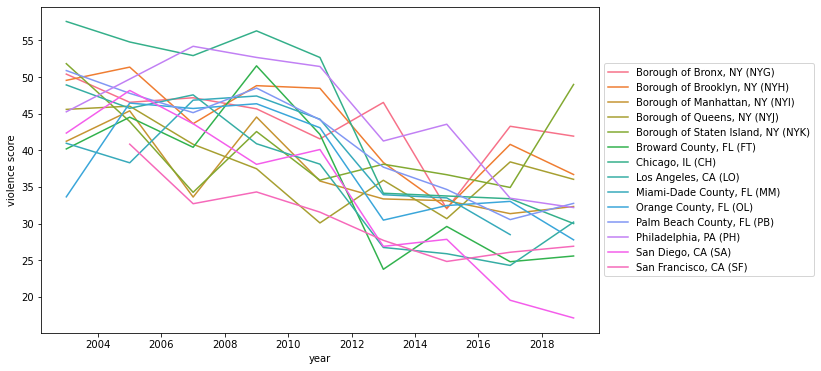

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

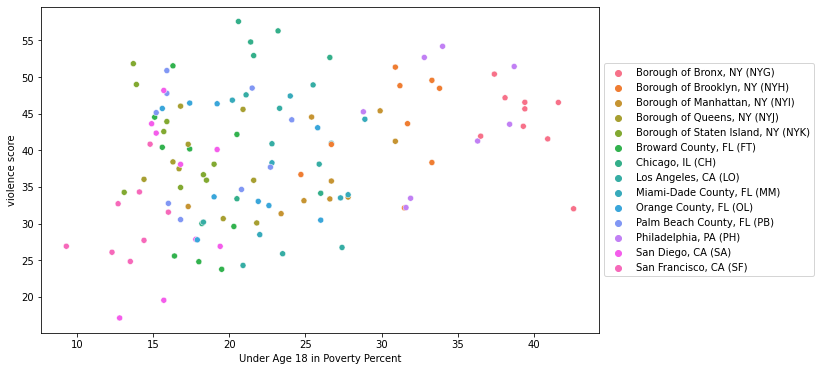

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Under Age 18 in Poverty Percent", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

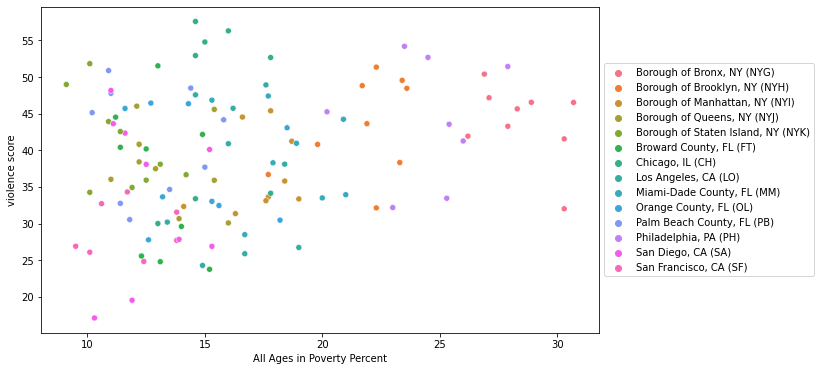

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="All Ages in Poverty Percent", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

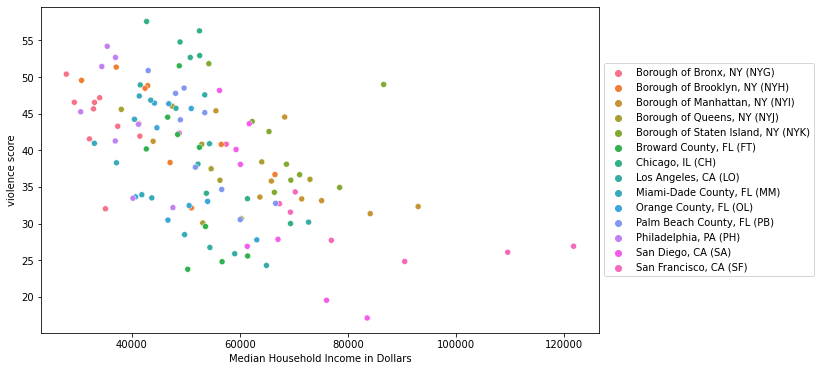

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Median Household Income in Dollars", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

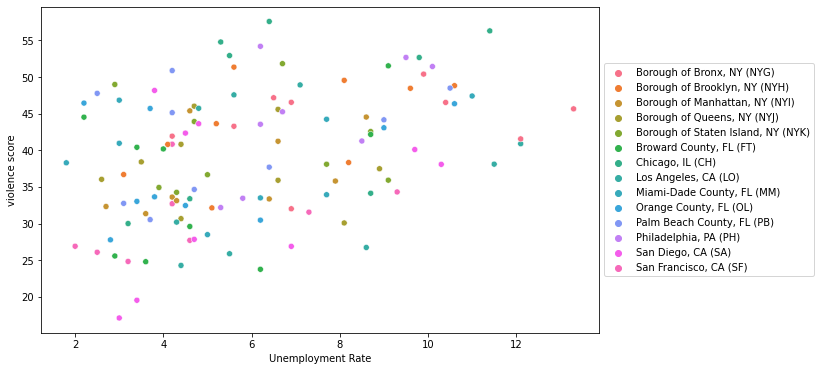

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Unemployment Rate", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

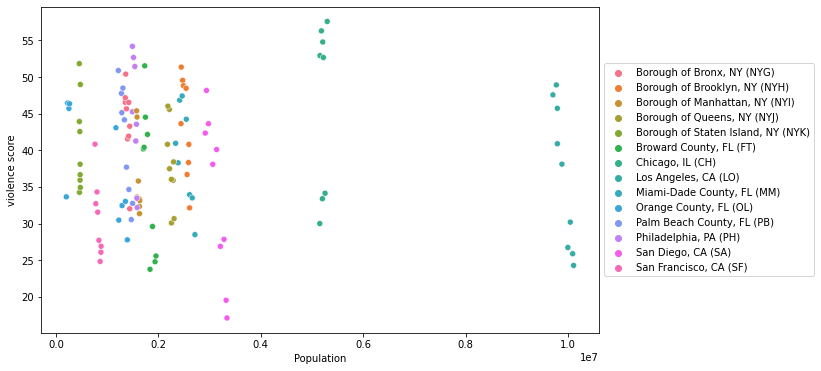

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Population", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

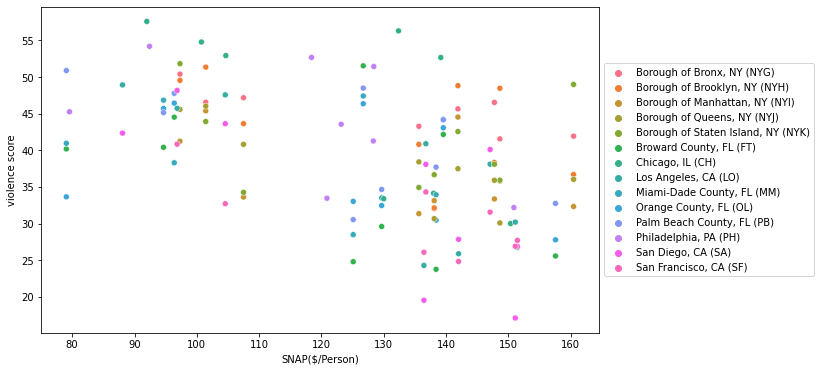

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SNAP($/Person)", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Graphic EDA Sex Split
[back to top](#Table-of-Contents)

In [51]:
dropCols = ["Year", 
            "State / County Name",
            "Ages 5 to 17 in Families SAIPE Poverty Universe",
            "Ages 5 to 17 in Families in Poverty Count",
            "Ages 5 to 17 in Families in Poverty Percent",
            "All Ages in Poverty Count",
            "All Ages SAIPE Poverty Universe",
            "Under Age 18 SAIPE Poverty Universe",
            "Under Age 18 in Poverty Count"]

vioRespKnn = vioResponceKNN.reset_index().merge(dat2.reset_index(),
                                   how='inner',
                                   left_on=["year", "sitename"],
                                   right_on=["Year", "State / County Name"]).drop(dropCols, axis=1)

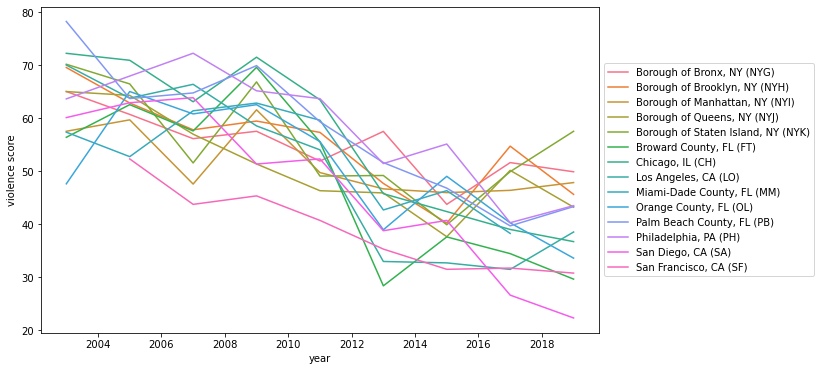

In [56]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="violence score", hue="sitename", data=vioRespKnn[vioRespKnn.sex == "Male"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

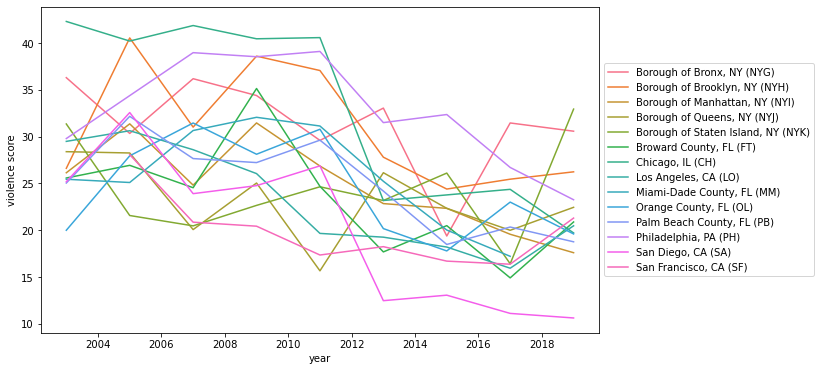

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="violence score", hue="sitename", data=vioRespKnn[vioRespKnn.sex == "Female"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

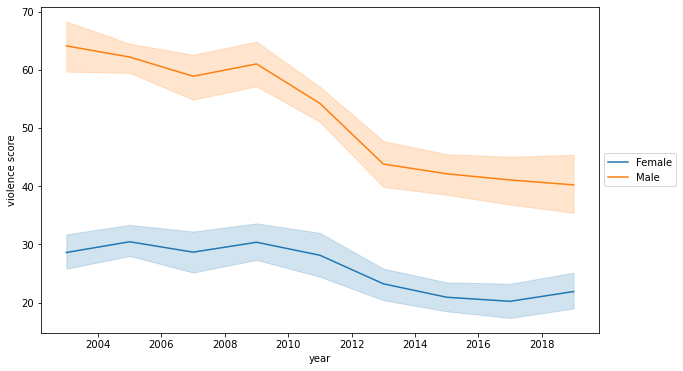

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="violence score", hue="sex", data=vioRespKnn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

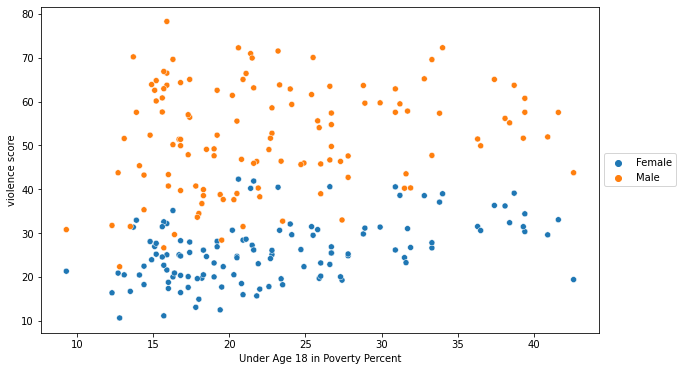

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Under Age 18 in Poverty Percent", y="violence score", hue="sex", data=vioRespKnn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

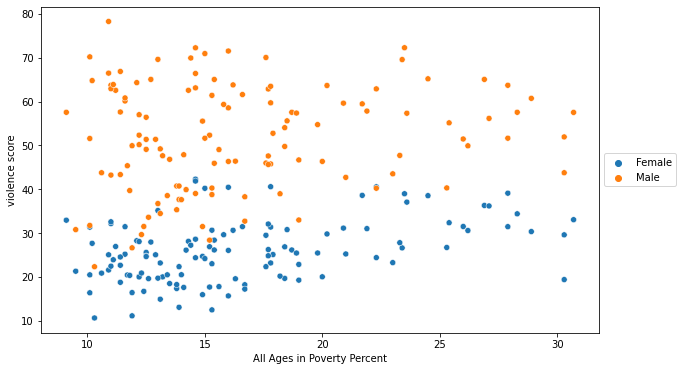

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="All Ages in Poverty Percent", y="violence score", hue="sex", data=vioRespKnn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

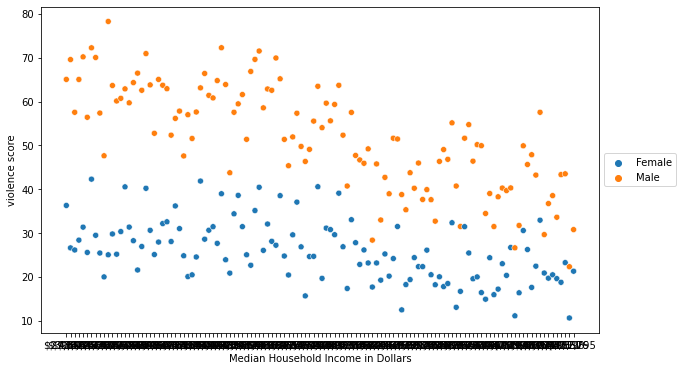

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Median Household Income in Dollars", y="violence score", hue="sex", data=vioRespKnn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

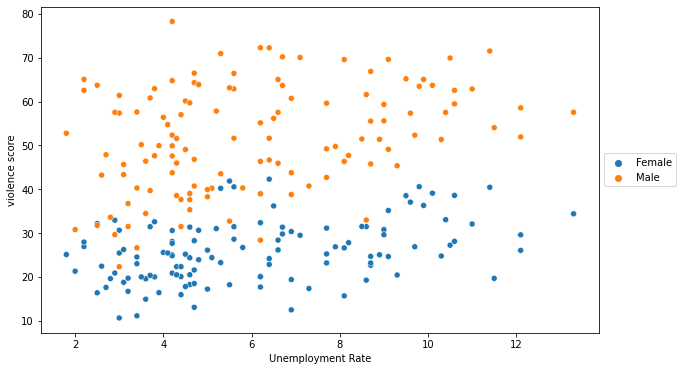

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Unemployment Rate", y="violence score", hue="sex", data=vioRespKnn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

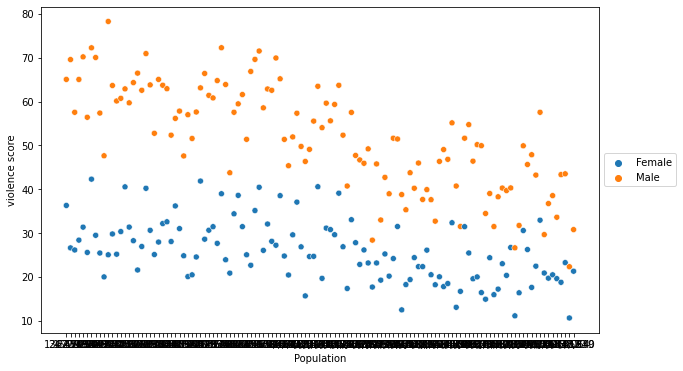

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Population", y="violence score", hue="sex", data=vioRespKnn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

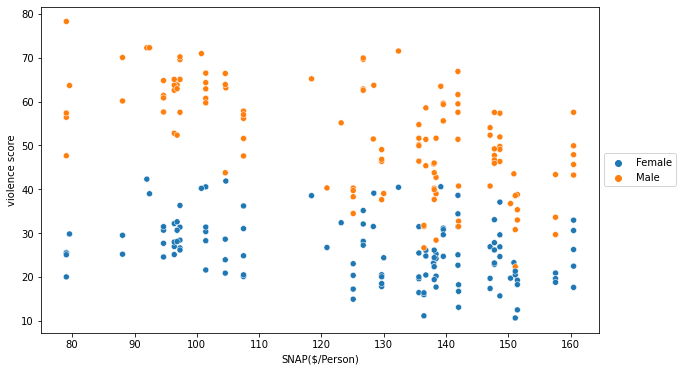

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SNAP($/Person)", y="violence score", hue="sex", data=vioRespKnn)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))